Constance Delannoy

APPM 4650 | Homework 5

July 24, 2020

In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="The raw code is by default hidden for easier reading."></form>''')

__Question 1__

TBD

__Question 2__

We define the initial vector $x$

** mention precision on only 1 value

In [143]:
def sor(a, b, x0, w, tol, iters):
    """This function performs Gauss-Steidel with relaxation as described in the homework Q2.
    
    Keyword arguments:
    a -- matrix A
    b -- matrix B
    x0 -- initial value of vector X
    w -- relaxation parameter
    tol -- tolerance
    iters -- number of times -1 to run algorithm
    """
    
    k = 0
    n = len(x0)
    x=[None]*3
    
    while k <= iters:
        for i in range(n):
            sum1 = 0
            sum2 = 0
            
            for j in range(i):
                sum1 += a[i,j]*x[j]
                
            for j in range(i, n):
                sum2 += a[i,j]*x0[j]

            x[i] = x0[i] + (w/a[i,i])*(b[i] - sum1 - sum2)
            
        if abs(x[0]-x0[0]) < tol and abs(x[1]-x0[1]) < tol and abs(x[2]-x0[2]) < tol:
            k+=1
            #print('convergence achieved')
            break
                
        if k == iters:
            #print('maximum number of iterations achieved')
            break
                
        k += 1
        for i in range(n):
            x0[i] = x[i]
            
    return x, k

In [144]:
res = []
iters = []
omegas1 = np.arange(-2, 0, 0.01).tolist()
omegas2 = np.arange(0.25, 2.25, 0.01).tolist()
omegas = omegas1 + omegas2

for v in omegas:
    A = np.matrix([[4,3,0],[3,4,-1],[0,-1,4]])
    X = [24/4, 30/4, -24/4]
    B = [24, 30, -24]
    x_sol, num_iters = sor(A, B, X, v, 10**(-6), 100)
    res.append(x_sol)
    iters.append(num_iters)

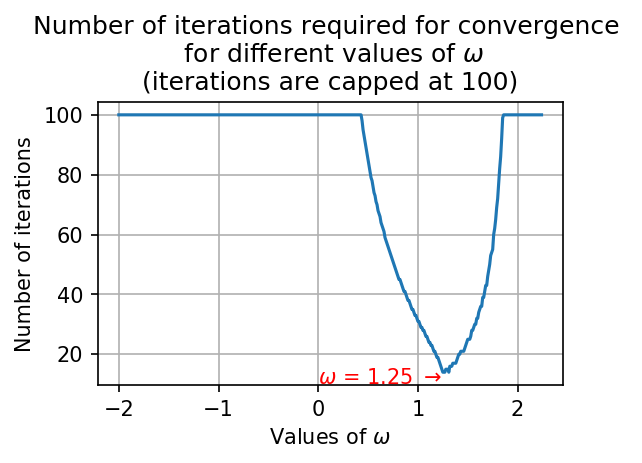

In [145]:
fig1 = plt.figure(figsize = (4, 2.5), dpi = 150)
ax1 = fig1.add_subplot(1, 1, 1)

ax1.grid(b=True, which='major', linestyle='-')
ax1.plot(omegas, iters)
ax1.legend()
ax1.set_xlabel(r'Values of $\omega$')
ax1.set_ylabel('Number of iterations')
ax1.set_title('Number of iterations required for convergence \n for different values of ' + r'$\omega$' + '\n(iterations are capped at 100)')
ax1.text(0, 10, r'$\omega$ = 1.25 $\rightarrow$', color = 'r')

plt.show()

Based on this graph, the optimal value of $\omega$ is 1.25, which results in only 14 iterations.

The results provide the following $x$ vector with $10^{-6}$ precision:

In [155]:
res[-4]

tst = pd.DataFrame({'i':iters, 'omegas':omegas})
tst2 = tst.where(tst['i']==14).dropna()
tst2

,i,omegas
300,14.0,1.25
301,14.0,1.26
302,14.0,1.27
306,14.0,1.31


__Question 3__

(a) We have the following matrix at hand:

$$
A = \begin{pmatrix}
   3 & 0 & 1 \\
   0 & 5 & 0 \\
   -1 & 1 & -1 \\
\end{pmatrix}
$$

We start by calculating its minor $M$

$$
M = \begin{pmatrix}
   -5-0 & 0 & 0+5 \\
   0 -1 & -3+1 & 3-0 \\
   0-5 & 0 & 15-0 \\
\end{pmatrix}
=
\begin{pmatrix}
   -5 & 0 & 5 \\
   -1 & -2 & 3 \\
   -5 & 0 & 15 \\
\end{pmatrix}
$$

We now find the corresponding matrix of cofactors $C$:

$$
C = \begin{pmatrix}
   -5 & 0 & 5 \\
   1 & -2 & -3 \\
   -5 & 0 & 15 \\
\end{pmatrix}
$$

From $C$, we find the Adjugate matrix that we call $C^T$ by transposing C:

$$
C^T = \begin{pmatrix}
   -5 & 1 & -5 \\
   0 & -2 & 0 \\
   5 & -3 & 15 \\
\end{pmatrix}
$$

Finally, we compute the determinant of the original matrix $A$:

$detA = 3(-5-0) + 0 + 1(0+5) = -10$

We can now at last compute the inverse of $A$:

$$
A^{-1} = \begin{pmatrix}
   0.5 & -0.1 & 0.5 \\
   0 & 0.2 & 0 \\
   -0.5 & 0.3 & -1.5 \\
\end{pmatrix}
$$

(b)

In [7]:
def matrixIter(x0, A):
    """
    This function returns the next iteration of the inverse of a matrix
    based on an initial guess x0 and the original matrix A.
    
    x0 --- initial matrix inverse guess of size 3x3
    A --- original matrix of size 3x3
    """
    
    I = np.matrix([[1,0,0],[0,1,0],[0,0,1]])
    
    return x0*(2*I - A*x0)

In [8]:
X0 = np.matrix([[0.5, -0.1, 0.4],[0, 0.2, 0],[-0.4, 0.3, -1.5]])
A = np.matrix([[3, 0, 1],[0, 5, 0],[-1, 1, -1]])

In this case, we use the initial guess 

$$
x_0 = \begin{pmatrix}
   0.5 & -0.1 & 0.4 \\
   0 & 0.2 & 0 \\
   -0.4 & 0.3 & -1.5 \\
\end{pmatrix}
$$

and find the following result for $x_1$:

In [9]:
matrixIter(X0, A)

matrix([[ 0.49, -0.1 ,  0.51],
        [ 0.  ,  0.2 ,  0.  ],
        [-0.51,  0.3 , -1.47]])

(c) **IS THIS RIGHT??**

To find the deviation of $x_0$ and $x_1$ from $A^{-1}$, we first compute the mean of each column of $A^{-1}$. Here, $\bar{A^-1}_i$ denotes the mean from the $ith$ column.

$\bar{A^{-1}_1} = \frac{0.5 + 0 - 0.5}{3} = 0$

$\bar{A^{-1}_2} = \frac{-0.1 + 0.2 + 0.3}{3} = 0.133333$

$\bar{A^{-1}_2} = \frac{0.5 + 0 - 1.5}{3} = -0.333333$

Based on these numbers, we infer the resulting deviation matrices $D_0$ for $x_0$ and $D_1$ for $x_1$:

$$
D_0 = \begin{pmatrix}
   0.5 - 0 & -0.1 - 0.133333 & 0.4 + 0.333333 \\
   0 - 0 & 0.2 - 0.133333 & 0 + 0.333333 \\
   -0.4 - 0 & 0.3 - 0.133333 & -1.5 + 0.333333 \\
\end{pmatrix}
= 
\begin{pmatrix}
   0.5 & -0.23334 & 0.06667 \\
   0 & 0.66667 & 0.333333 \\
   -0.4 & 0.16666 & -1.83333 \\
\end{pmatrix}
$$

$$
D_1 = \begin{pmatrix}
   0.49 - 0 & -0.1 - 0.133333 & 0.51 + 0.333333 \\
   0 - 0 & 0.2 - 0.133333 & 0 + 0.333333 \\
   -0.51 - 0 & 0.3 - 0.133333 & -1.47 + 0.333333 \\
\end{pmatrix}
= 
\begin{pmatrix}
   0.49 & -0.23334 & 0.17667 \\
   0 & 0.66667 & 0.333333 \\
   -0.51 & 0.16666 & -1.80333 \\
\end{pmatrix}
$$

We note that $x_1$ overshot some of the answers but is closer to the true value of $A^{-1}$ when considering all each column at once.

__Question 4__

(a)

In [10]:
# This is for Q3
#0.3 - (-0.1+0.2+0.3)/3
#0.51 + (0.5+0-1.5)/3

In [45]:
def powerMethod(A_start, x_start, iters, tol):
    """
    This function runs the power method to find eigenvalues of A.
    It returns dominant eigenvalue, associated eigenvector and number of iterations
    
    A_start --- initial matrix
    x_start --- initial guess
    iters -- number of iterations to run this for
    tol -- tolerance for convergence
    """
    for i in range(iters):
        x_1 = A_start*x_start
        x_2 = A_start*x_1
        ratios = []

        for j in range(len(x_start)):
            
            if x_1[j] == 0 & x_2[j] == 0 :
                ratios.append(0)
                
            elif abs(x_start[j]/x_1[j] - x_1[j]/x_2[j]) < tol:
                ratios.append(x_1[j]/x_2[j])
        
        if(len(ratios) == len(x_start)):
            return ratios, x_2, i
        else:
            x_start = x_1

In [46]:
A = np.matrix([[2, -1, 0, 0],[-1, 2, -1, 0],[0, -1, 2, -1], [0, 0, -1, 2]])
x0a = [[1],[1],[1],[1]]

eigena, Va, num_itera = powerMethod(A, x0a, 10, 10**(-4))

In [47]:
eigena

[matrix([[ 0.38196721]]),
 matrix([[ 0.38196286]]),
 matrix([[ 0.38196286]]),
 matrix([[ 0.38196721]])]

In [48]:
Va/Va[0] # normalizing

matrix([[ 1.        ],
        [-0.61803279],
        [-0.61803279],
        [ 1.        ]])

In [49]:
num_itera

6

(b)

We use a similar procedure with a different initial vector:

$$
x_0= 
\begin{pmatrix}
   1 \\
   1 \\
   5 \\
   1 \\
\end{pmatrix}
$$

In [50]:
x0b = [[1],[1],[1],[1]]
eigenb, Vb, num_iterb = powerMethod(A, x0b, 100, 10**(-4))

In [51]:
eigenb

[matrix([[ 0.38196721]]),
 matrix([[ 0.38196286]]),
 matrix([[ 0.38196286]]),
 matrix([[ 0.38196721]])]

In [52]:
Vb/Vb[0]

matrix([[ 1.        ],
        [-0.61803279],
        [-0.61803279],
        [ 1.        ]])

In [53]:
num_iterb

6

We find that we achieve convergence towards the same eigenvalue and eigenvector in the same number (6) of iterations as with the initial $x_0$. 


__Question 5__

(a) To compute the Raleigh quotient and error estimate, we first use the power method to find $x_2$ and $x_3$.

In [54]:
A5 = np.matrix([[2, -1, 1], [-1, 3, 2], [1, 2, 3]])
x05 = [[1], [1], [1]]

x15 = A5*x05
x25 = A5*x15
x35 = A5*x25

We find that:

$$
x_2= 
\begin{pmatrix}
   6 \\
   22 \\
   28 \\
\end{pmatrix}
;
x_3= 
\begin{pmatrix}
   18 \\
   116 \\
   134 \\
\end{pmatrix}
$$

We now compute $m_0 = x_3^T x_3$ and $m_4 = x_3^T A x_3$ and find that:

$m_0 = 31736; m_4 = 157708$.

We then deduct the Rayleigh quotient $q = \frac{m_4}{m_0}$ to find:

$q = 4.96937$


**ERROR ESTIMATE IS MSE of $X_2$ AND $X_3$?? $\rightarrow$ my MSE is realy big**

In [81]:
m0 = np.transpose(x35)*x35
m3 = np.transpose(x35)*A5*x35

In [82]:
m0

matrix([[31736]])

In [83]:
m3

matrix([[157708]])

In [84]:
m3/m0

matrix([[ 4.96937232]])

In [85]:
dist = (x35-x25).tolist()
dist_sq = list(map(lambda x: x[0]**2, dist))
mse = sum(dist_sq)/len(dist_sq)

In [86]:
mse

6738.666666666667

(b)

We use a similar approach as in question 4 to get $\lambda_{max}$ and $V_{max}$.

In [73]:
eigen, V, num_iter = powerMethod(A5, x05, 100, 10**(-6))

In [74]:
eigen

[matrix([[ 0.33333333]]), matrix([[ 0.19999903]]), matrix([[ 0.20000097]])]

In [75]:
V/V[0]

matrix([[  1.00000000e+00],
        [  6.83772807e+04],
        [  6.83782807e+04]])

In [76]:
num_iter

19